# **Code Demonstration of the Central Limit Theorem**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
# Load data and explore the statistics
lego = pd.read_csv('/content/lego_sets.csv')
lego['piece_count'].describe()


count    12261.000000
mean       493.405921
std        825.364580
min          1.000000
25%         97.000000
50%        216.000000
75%        544.000000
max       7541.000000
Name: piece_count, dtype: float64

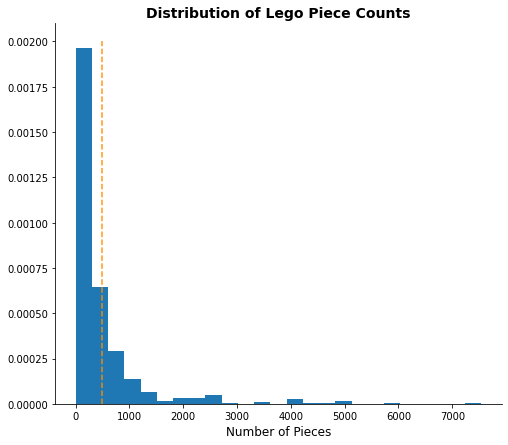

In [ ]:
# Create a density histogram for lego piece counts.
fig, ax = plt.subplots(figsize=(8, 7))
x = lego['piece_count']
ax.hist(x, bins=25, density=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Format the histrogram labels, range, and borders.
ax.set_title("Distribution of Lego Piece Counts", size=14, weight="bold")
ax.set_xlabel("Number of Pieces", fontsize=12)
x_axis = range(-1000, 2000)

# Plot a vertical line at population mean.
pop_mean = 493.405921
ax.vlines(x=pop_mean, colors='DarkOrange', ymin=0, ymax=.002,
          linestyles='--', alpha=0.9)

plt.show()


In [ ]:
def get_samples(sample_size):
  """
  This function takes 30 random samples from the population of 
  Lego Piece Counts and returns a list of the sample means.
  --------------------
  Input parameters:
  sample_size: integer specifying sample size
  """

    piece_count = lego['piece_count']
    n = 30
    sample_means = []

    # Take 30 random samples from the population and store the sample means.
    for i in range(n):
        sample = np.random.choice(piece_count, sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means


In [ ]:
def plot_histogram(sample_means_ls):
    """
    This function returns plots the sample means distibution for four
    different sample sizes, specified by the user.
    --------------------
    Input parameters:
    sample_means_ls: list of lists containing
    """

    pop_mean = np.mean(lego['piece_count'])

    # Define a grid to plot 4 graphs.
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for idx, ax in enumerate(axes.flatten(), 0):
        # Find the sample statistics.
        mean = np.mean(sample_means_ls[idx])
        std = np.std(sample_means_ls[idx])

        # Plot a density histogram for each sample.
        ax.hist(sample_means_ls[idx], density=True)

        # Format the histrogram labels, range, and borders.
        ax.set_xlim(-500, 1500)
        ax.set_ylim(0, 0.005)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        x_axis = range(-1000, 2000)
        ax.set_ylabel("Density")
        ax.set_xlabel("Sample Means")

        # Plot a normal distribution with sample mean and standard deviation.
        ax.plot(x_axis, norm.pdf(x_axis, mean, std))
        ax.set_title(f'Sample Size: {sample_size_ls[idx]}')

        # Plot a verticle line at population mean for comparison
        ax.vlines(x=pop_mean, colors='black', ymin=0, ymax=0.005,
                  linestyles='--', alpha=0.3)
    plt.show()


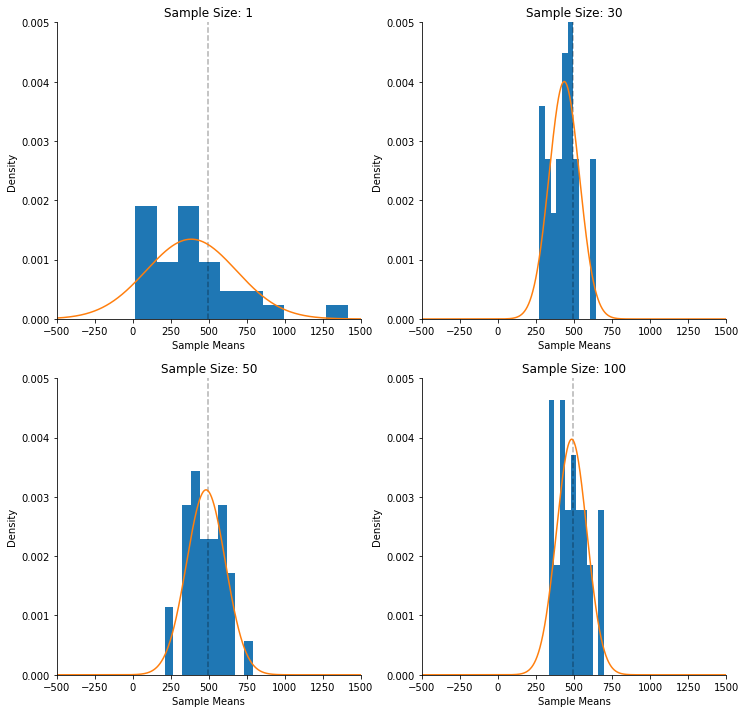

In [ ]:
# Simulate the central limit theorem for 4 different sample sizes.
sample_size_ls = [1, 30, 50, 100]
sample_means_ls = []
for sample_size in sample_size_ls:
    sample_means_ls.append(get_samples(sample_size))

# Plot the sampling distributions of the means.
plot_histogram(sample_means_ls)
